# **Aprendizado de Máquina**<BR> **Aula 02** - Modelos de regressão linear e não linear

# **Exemplo 1**: regressão linear com <u>dados externos</u>

## **1)** Importação de bibliotecas e classes

In [ ]:
import pandas as pd                   # Leitura de dados e operações em DataFrames
from matplotlib import pyplot as plt  # Geração de gráficos
from sklearn.linear_model import LinearRegression # Importation of LinearRegression

## **2)** Leitura de dados e exploração inicial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Obs.: "monte" o disco e obtenha o caminho do arquivo de dados
# antes de executar esta célula (caso contrário, ocorrerá erro)

caminho_arquivo = "/content/drive/MyDrive/Colab Notebooks/Aula2_ML/A02Ex1_carros.csv"

df = pd.read_csv(caminho_arquivo)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


### **2.1)** Visualização do *DataFrame*

In [ ]:
# Exibição "completa" do DataFrame
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger


###**2.2)** Informações gerais

In [ ]:
# Dimensões do DataFrame
df.shape

(392, 9)

In [ ]:
# Tipos de dados das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 27.7+ KB


In [ ]:
# Resumo estatístico
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### **2.3)** Gráficos

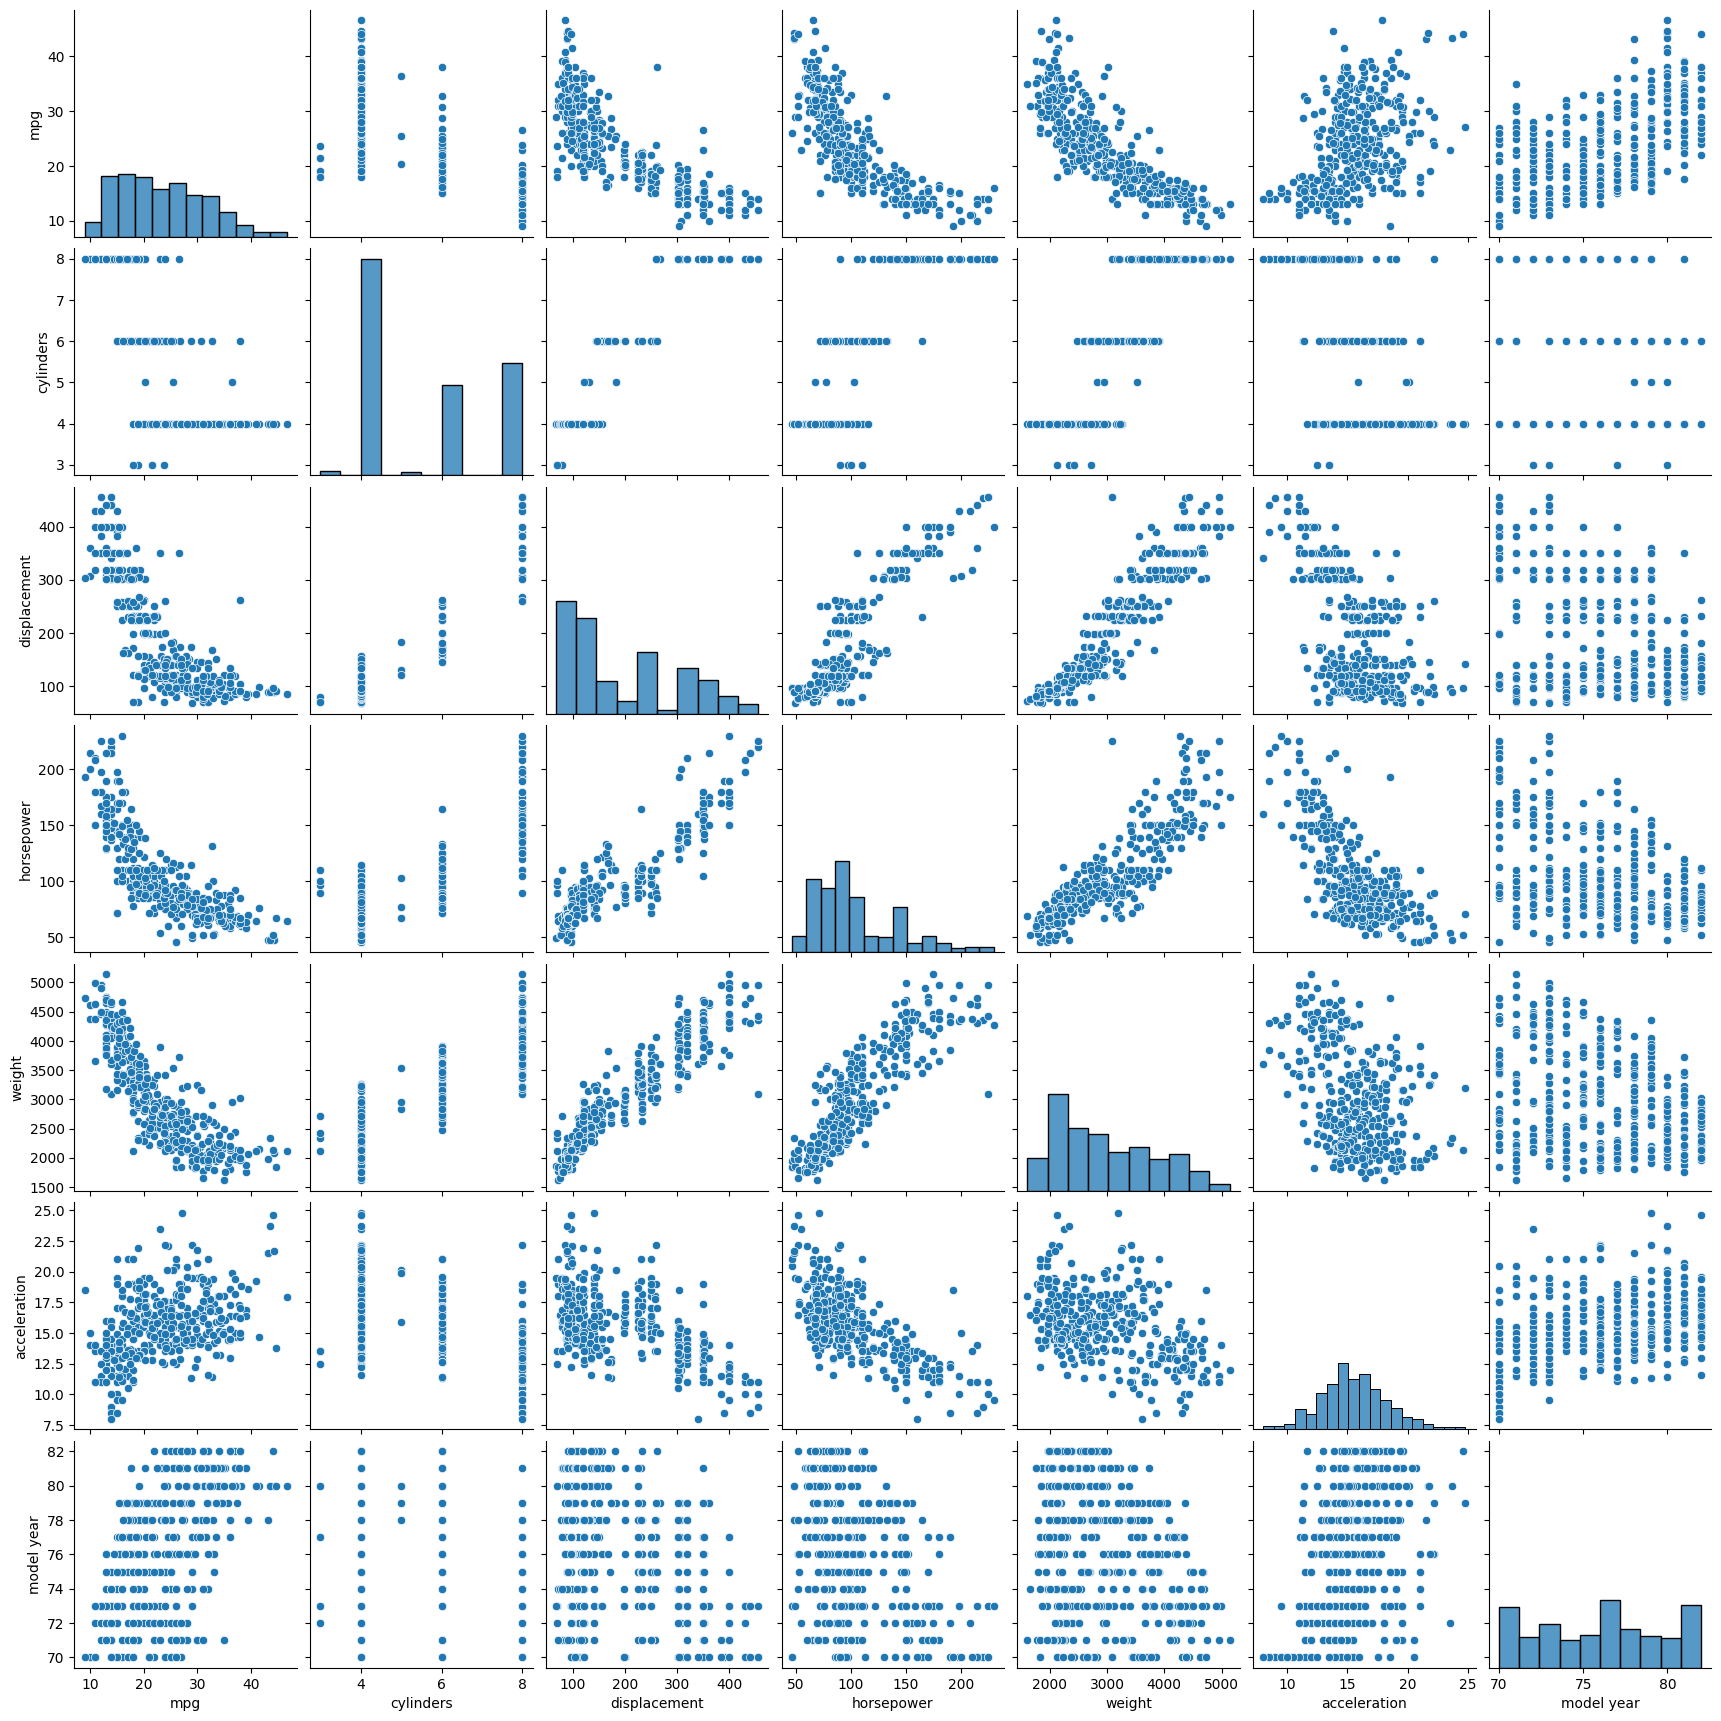

In [ ]:
# Visualização gráfica unificada: matriz de diagramas de dispersão
# Requer a importação da biblioteca Seaborn!
import seaborn as sns

sns.pairplot(data = df)
plt.show()

### **2.4)** Correlações

In [ ]:
# Análise das correlações lineares
# Critério: |r| entre 0 e 0,4: fraca
#           |r| acima de 0,4 e abaixo de 0,7: moderada
#           |r| maior ou igual a 0,7: forte


In [ ]:
df.corr(numeric_only = True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


## **3)** Pré processamento e Seleção de variáveis

In [ ]:
# Codificação one-hot das origens
df_cod = pd.get_dummies(data = df,
                        columns = ['origin'],
                        drop_first = True,
                        dtype = int)
display(df_cod)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_Europe,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,0,1
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,0,1
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,0,1
4,17.0,8,302.0,140,3449,10.5,70,ford torino,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,0,1
388,44.0,4,97.0,52,2130,24.6,82,vw pickup,1,0
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage,0,1
390,28.0,4,120.0,79,2625,18.6,82,ford ranger,0,1


In [ ]:
# Variável dependente - resposta
y = df_cod['mpg']

# Variáveis independentes - atributos
X = df_cod.drop(columns = ['mpg','car name'])

## **4)** Treinamento do modelo de regressão linear múltipla

In [ ]:
# Forma do modelo: y^ = f(x1) = theta_0 + theta_1*x1

reg1 = LinearRegression()   # Cria instância do objeto "modelo de regressão  linear"
reg1.fit(X,y)               # Treina o modelo com todos os dados disponíveis

LinearRegression()

### **4.1)** Coeficientes do modelo e qualidade do ajuste

In [ ]:
# Exibe os coeficientes do modelo
print("Theta_0:", reg1.intercept_)
print("Theta_1:", reg1.coef_)

# Exibe o valor de R^2
print("R^2:", reg1.score(X,y))


Theta_0: -15.101373838812638
Theta_1: [-0.48970942  0.02397864 -0.01818346 -0.00671038  0.07910304  0.77702694
 -0.22322587 -2.85322823]
R^2: 0.8241994699119171


In [ ]:
# Opção de exibição
# Exibição dos coeficientes em forma tabular
print("Coeficiente linear =",reg1.intercept_)

df_coef = pd.DataFrame.from_dict({"Variável": X.columns,
                                  "Coeficiente": reg1.coef_})
print("Coeficientes das variáveis:\n", df_coef)

Coeficiente linear = -15.101373838812638
Coeficientes das variáveis:
         Variável  Coeficiente
0      cylinders    -0.489709
1   displacement     0.023979
2     horsepower    -0.018183
3         weight    -0.006710
4   acceleration     0.079103
5     model year     0.777027
6  origin_Europe    -0.223226
7     origin_USA    -2.853228


In [ ]:
# Função para o cálculo do coeficiente de determinação da regressão
# linear simples (R^2) ou múltipla (R^2 ajustado):

def R2_R2ajust(estimador,X,y):
  R2 = estimador.score(X,y)  # R^2
  n = len(y)      # Quantidade de dados de treino
  m = X.shape[1]  # Quantidade de variáveis independentes do modelo
  if m == 1:
    return R2   # Regressão simples: retorna R^2
  else:
    return 1-((n-1)/(n-m-1))*(1-R2)  # Regressão múltipla: R^2 ajustado

In [ ]:
# Qualidade do ajuste

print("Coeficiente de determinação AJUSTADO:", R2_R2ajust(reg1,X,y))

Coeficiente de determinação AJUSTADO: 0.8205273961763957


# **Exercício 2**. Validação do modelo do Exercício 1 (avaliação da capacidade de generalização)

## **1)** Validação cruzada *hold-out*

In [ ]:
# Separação dos dados em conjuntos de treino e teste
# Importação da biblioteca necessária
from sklearn.model_selection import train_test_split

# Parâmetros da função 'train_test_split':
#   X,y = arrays (ou equivalentes) das variáveis independentes (X) e dependente (y)
#   train_size/test_size = percentual de dados de treino/teste. Padrão: 75% (treino) e 25% (teste)
# Retorno:
#   Tupla (4 valores) dos atributos de treino e teste e respostas (idem)

# Divide os dados: 80% para treino ('train_size'), 20% para teste
# IMPORTANTE: sem o controle do parâmetro 'random_state', diferentes partições
# do conjunto de dados serão retornadas a cada execução do método de divisão
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,train_size = 0.8)

print("Dimensões dos dados de treino:",X_treino.shape)
print("Dimensões dos dados de teste:",X_teste.shape)

Dimensões dos dados de treino: (313, 8)
Dimensões dos dados de teste: (79, 8)


In [ ]:
# Treinamento do modelo (com os dados de treino = 80% do total)
reg = LinearRegression()
reg.fit(X_treino,y_treino)

LinearRegression()

In [ ]:
# Qualidade do ajuste
print("Coeficiente de determinação AJUSTADO =",R2_R2ajust(reg,X_treino,y_treino))

Coeficiente de determinação AJUSTADO = 0.8231643145713167


In [ ]:
# Erros de previsão: RMSE e MAPE do modelo para os dados de teste
# Importação da biblioteca necessária (cálculos das métricas)
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

# Cálculo das previsões
y_prev_teste = reg.predict(X_teste)

# Principais parâmetros das funções 'root_mean_squared_error'
# e 'mean_absolute_percentage_error':
#   y_true = valores reais da resposta
#   y_pred = valores previstos (pelo modelo) da resposta

RMSE = root_mean_squared_error(y_true = y_teste,y_pred = y_prev_teste)
MAPE = mean_absolute_percentage_error(y_true = y_teste,y_pred = y_prev_teste)
print("RMSE (dados de teste) =",RMSE)
print("MAPE (para os dados de teste) =",MAPE)

RMSE (dados de teste) = 3.5974735160936246
MAPE (para os dados de teste) = 0.12234176832819385


## **2)** Validação cruzada *k-folds*

In [ ]:
# Importação da bilioteca necessária
from sklearn.model_selection import cross_val_score

# Parâmetros da função 'cross_val_score':
#   estimator = um estimador (neste caso, um objeto da classe 'LinearRegression')
#   X,y = arrays (ou equivalentes) das variáveis independentes (X) e dependente (y)
#   cv = número [inteiro] de partições (k); valor padrão: k = 5
#   scoring = texto indicativo da métrica de qualidade a ser calculada
# Retorno:
#   array (Numpy) com os k valores da métrica selecionada

# Executa a validação cruzada k-folds, com k = 10, avaliando a métrica RMSE
aval = -cross_val_score(reg,X,y,cv = 10,scoring = 'neg_root_mean_squared_error')

# Calcula o coeficiente de variação das avaliações = desvio padrão/média
# Critério:
# Até 20%: variação baixa
# De 20% a 60%: variação moderada
# Acima de 60%: variação alta

print("Valores de RMSE obtidos:",aval)
print("")   # "Imprime" uma linha em branco
print("RMSE médio =",aval.mean())
print("Coeficiente de variação (%) =",100*aval.std(ddof = 1)/aval.mean())

Valores de RMSE obtidos: [3.09431766 2.96962267 3.34419237 2.94695467 2.26116813 2.64004982
 4.30759279 3.54509763 5.48761547 3.76094993]

RMSE médio = 3.4357561127739884
Coeficiente de variação (%) = 26.89001269694923


In [ ]:
# Executa a validação cruzada k-folds, com k = 10, avaliando a métrica MAPE
aval = -cross_val_score(reg,X,y,cv = 10,scoring = 'neg_mean_absolute_percentage_error')

print("Valores de MAPE obtidos:",aval)
print("")   # "Imprime" uma linha em branco
print("MAPE médio =",aval.mean())
print("Desvio padrão =",aval.std(ddof = 1))

Valores de MAPE obtidos: [0.17045472 0.14224007 0.15964088 0.14137701 0.08389788 0.11444544
 0.15044077 0.11243597 0.11555141 0.10091691]

MAPE médio = 0.12914010558375474
Desvio padrão = 0.027759453632138307
